In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [3]:
df_statlog=pd.read_csv('capstone datasets/Heart Disease Statlog/Heart_disease_statlog.csv')

In [4]:
df_statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [5]:
df_statlog.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


#### Assign X and y from the above dataset

In [6]:
X=df_statlog.drop(labels='target',axis=1)
y=df_statlog['target']

In [7]:
X_const = sm.add_constant(X)

In [8]:
model = sm.OLS(y, X_const)

#### Lasso - L1 regularization

In [9]:
results = model.fit_regularized(method = 'elastic_net', alpha = 1.0, L1_wt = 1.0)
results.params

const       0.000000
age         0.003585
sex         0.000000
cp          0.000000
trestbps    0.004286
chol        0.000920
fbs         0.000000
restecg     0.000000
thalach    -0.003695
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
dtype: float64

#### With alpha being 1.0, Lasso (L1_st=1.0) is trying to make many of the feature model parameters to zero. As we can observe, out of total of 14 columns, 10 columns shrank to zero

Higher alpha - stronger regularization - more shrinkage of coefficients toward zero <br>
Lower aplha - weaker regularization - coefficient coloser to normal OLS

#### Let's see how increasing and decreasing of alpha would change the coefficients

In [10]:
results = model.fit_regularized(method = 'elastic_net', alpha = 0.0, L1_wt = 1.0)
results.params

const       0.082323
age         0.000516
sex         0.145099
cp          0.090506
trestbps    0.000009
chol        0.000044
fbs        -0.074602
restecg     0.040746
thalach    -0.002914
exang       0.117579
oldpeak     0.046521
slope       0.042560
ca          0.130483
thal        0.127632
dtype: float64

#### With alpha being zero, there is no regularization applied and none of the coefficients are zero

In [11]:
results = model.fit_regularized(method = 'elastic_net', alpha = 2.0, L1_wt = 1.0)
results.params

const       0.000000
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.003089
chol        0.001259
fbs         0.000000
restecg     0.000000
thalach    -0.001917
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
dtype: float64

#### With alpha =1.0, 4 coefficients were non-zero. As we increased alpha=2.0, now only 3 coeffients are non-zero. So, now the Lasso model is highly regularized

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Now, let's see what Ridge does to the parameters

In [12]:
results = model.fit_regularized(method = 'elastic_net', alpha = 1.0, L1_wt = 0.0)
coefficients = pd.Series(results.params, index=X_const.columns)
print(coefficients)

const       0.002487
age         0.000688
sex         0.041682
cp          0.062711
trestbps    0.003032
chol        0.000750
fbs        -0.006905
restecg     0.024851
thalach    -0.004282
exang       0.032544
oldpeak     0.045646
slope       0.020454
ca          0.067306
thal        0.083747
dtype: float64


#### Ridge (L2 Regularization) did not make any coefficient to zero. Apparently, Ridge shrinks coefficients toward 0 but doesn’t eliminate them like Lasso

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Now, let's dive into the Elastic Net regression model. Apparently, that is the method used in the above Lasso and Ridge statsmodels fit_regularize method but with different L1_wt parameter to determine which model is being used.

Elastic Net add both Lasso and Ridge penalties to loss function

In [13]:
results = model.fit_regularized(method = 'elastic_net', alpha = 1.0, L1_wt = 0.5)
coefficients = pd.Series(results.params, index=X_const.columns)
print(coefficients)

const       0.000000
age         0.007634
sex         0.000000
cp          0.000000
trestbps    0.003999
chol        0.000686
fbs         0.000000
restecg     0.000000
thalach    -0.004512
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
dtype: float64


We can clearly see here that some of the coefficients were shrinked (Ridge Effect) and some of them are zero (Lasso effect). With that it is evident, both Lasso and Ridge were used (50-50%).

So, Elastic Net used Feature Selection, handled multicolinearity to optimize the loss.

#### Lasso prediction and R square values

R2 Scores for different alphas: [np.float64(0.5376868423099715), np.float64(0.14998951424226448), np.float64(0.09589617125959737)]


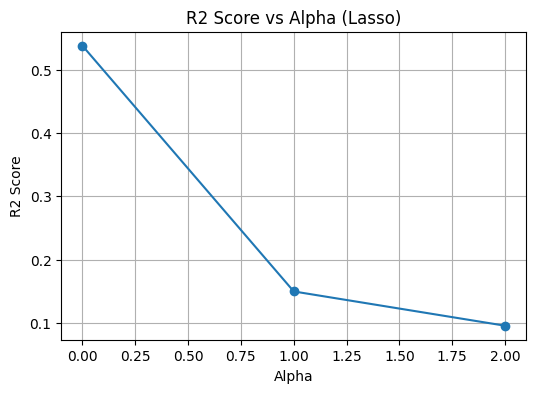

In [15]:
alphas = [0.0, 1.0, 2.0]
r2_scores = []

for alpha in alphas:
    results = model.fit_regularized(method='elastic_net', alpha=alpha, L1_wt=1.0)
    y_pred = results.predict(X_const)
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    r2_scores.append(r2)

print("R2 Scores for different alphas:", r2_scores)
plt.figure(figsize=(6,4))
plt.plot(alphas, r2_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Alpha (Lasso)')
plt.grid(True)
plt.show()

#### As observed, with increased alpha, R square is getting reduced. This is effect of over regularization. With alpha=2, the model is highly penalized and it becomes too simple, so underfitting is obvious.